# the badges problem
####                                                                                                                      _gautam dayal_

# Setup

In [25]:
import sys
if not '.' in sys.path:
  sys.path.insert(0, '.')

from preamble import *
%matplotlib inline

import mglearn
import numpy as np
import pandas as pd
import scipy as sp

# Creating the dataset

In [26]:
badges_file = open('data/badges-train.txt', 'r')
badges_lines = badges_file.readlines()
print(f"First 5 instances in file are: \n\n {badges_lines[:5]}")

First 5 instances in file are: 

 ['+ Naoki Abe\n', '- Myriam Abramson\n', '+ David W. Aha\n', '+ Kamal M. Ali\n', '+ Eric Allender\n']


I extracted each line from the text file, separated each one into an array of first and last name

In [27]:
# Adding the names as arrays of first and last name
names = []
for line in badges_lines:
    fullname = line[2:].split()
    if len(fullname) > 2:
        if fullname[0][1] == '.':
            fullname = [''.join(fullname[0:2])] + [fullname[2]]
        else:
            fullname = [fullname[0]] + [''.join(fullname[1:3])]
    names.append(fullname)

print(f"First 5 names: \n\n {names[:5]}")

First 5 names: 

 [['Naoki', 'Abe'], ['Myriam', 'Abramson'], ['David', 'W.Aha'], ['Kamal', 'M.Ali'], ['Eric', 'Allender']]


## Extracting the Features Using Feature Functions

In [28]:
"""
Features:
- number of letters (int)
- whether number of letter is even or odd (1/0)
- number of vowels (int)
- whether second letter is a vowel or not (1/0)
"""
# contains all the feature functions
# returns features as [letter_count, letter_by2, vowel_count, letter2_vowel]
    
def number_of_letters_fullname(fullname):
    first = fullname[0]
    last = fullname[1]
    letter_count = 0
    for c in first + last:
        if c.isalpha():
            letter_count += 1
    return(letter_count)
    
def is_number_letters_even(fullname):
    first = fullname[0]
    last = fullname[1]
    letter_by2  = 0
    if number_of_letters_fullname(first+last) % 2 == 0:
        letter_by2 = 1
    return(letter_by2)
    
def number_vowels_fullname(fullname):
    first = fullname[0]
    last = fullname[1]
    vowels = 'aeiouAEIOU'
    vowel_count = 0
    for c in first + last:
        if c in vowels:
            vowel_count += 1
    return(vowel_count)
    
def is_second_letter_firstname_vowel(fullname): 
    first = fullname[0]
    last = fullname[1]
    letter2_vowel = 0
    vowels = 'aeiouAEIOU'
    if first[1] != '.':
        if first[1] in vowels:
             letter2_vowel = 1
    else:
        if first[3] in vowels:
            letter2_vowel = 1
    return(letter2_vowel)
    

def getFeatures(fullname):
    feature_list = []
    feature_list.append(number_of_letters_fullname(fullname))
    feature_list.append(is_number_letters_even(fullname))
    feature_list.append(number_vowels_fullname(fullname))
    feature_list.append(is_second_letter_firstname_vowel(fullname))
    return feature_list
    
data = []
for fullname in names:
    instance = getFeatures(fullname)
    data.append(instance)
    
print(f"First 5 data instances: \n\n {data[:5]}")
    

First 5 data instances: 

 [[8, 1, 5, 1], [14, 1, 5, 0], [9, 1, 4, 1], [9, 1, 4, 1], [12, 1, 5, 0]]


In [29]:
# Setting targets for each instance. 1 for '+' and 0 for '-'
target = []
for line in badges_lines:
    sign = line[0]
    if sign == '+':
        target.append(1)
    elif sign == '-':
        target.append(0)

print(f"First 5 targets: \n\n {target[:5]}")

First 5 targets: 

 [1, 0, 1, 1, 1]


In [30]:
# Target names for output
target_names = ['-', '+']

In [31]:
data = np.array(data)
target = np.array(target)
target_names = np.array(target_names)

badges_dataset = {
    'data': data,
    'target': target,
    'target_names': target_names,
    'DESCR': 'Based on an event by Haym Hirsh. \n Data instances in the form of [letter_count, letter_by2, vowel_count, letter2_vowel]',
    'feature_names': ['better_count', 'letter_by2', 'vowel_count', 'letter2_vowel']
}

In [32]:
print(f"Keys of the badges dataset: \n\n {badges_dataset.keys()}")
print("\n                                 D A T A S E T       C R E A T E D\n")

Keys of the badges dataset: 

 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

                                 D A T A S E T       C R E A T E D



# Training

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    badges_dataset['data'], badges_dataset['target'], random_state=0)

In [34]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (165, 4)
y_train shape: (165,)


In [35]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (55, 4)
y_test shape: (55,)


## Looking at my data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2691c3c8>,
      dtype=object)

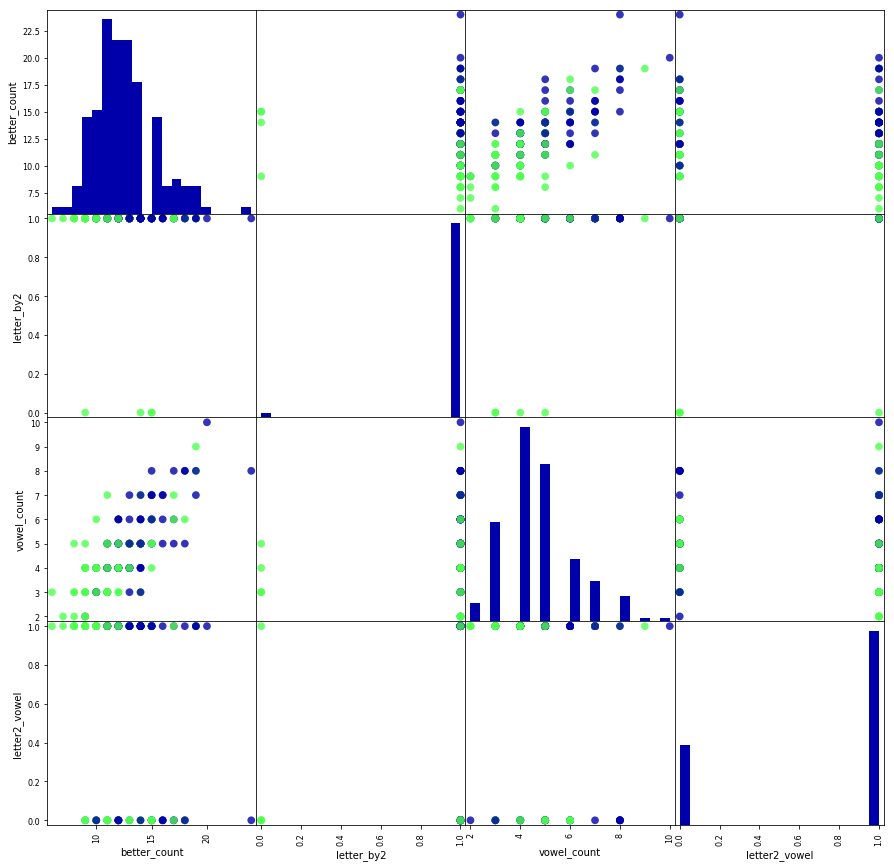

In [36]:
badges_dataframe = pd.DataFrame(X_train, columns=badges_dataset['feature_names'])

# creates a scatter matrix from the badges dataframe, color by 'y_train'
pd.plotting.scatter_matrix(badges_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap=mglearn.cm3)

## Training the Models

### k-NN Model

In [37]:
# First trying the K-nearest neighbors model

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

### Logistic Regression Model

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.1, penalty='l2').fit(X_train, y_train)

print(f"The coefficients for this linear model are: \n\n{logreg.coef_}")

The coefficients for this linear model are: 

[[-0.032  0.293 -0.122  0.172]]


/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Random Forest Model

In [39]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_estimators=10, random_state=2)
rforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

# Testing 

## k-NN Model

In [40]:
y_pred = knn.predict(X_test)

print(f"Test set predictions: \n {y_pred}")

Test set predictions: 
 [1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0]


In [41]:
print(f"Training set score: {knn.score(X_train, y_train)}")
print(f"Test set score: {knn.score(X_test, y_test)}")

Training set score: 0.7272727272727273
Test set score: 0.7090909090909091


## Logistic Regression Model 

In [42]:
y_pred = logreg.predict(X_test)

print(f"Test set predictions: \n {y_pred}")

Test set predictions: 
 [1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0
 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0]


In [43]:
print(f"Training set score: {logreg.score(X_train, y_train)}")
print(f"Test set score: {logreg.score(X_test, y_test)}")

Training set score: 0.6242424242424243
Test set score: 0.7090909090909091


### Viewing optimal parameters

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

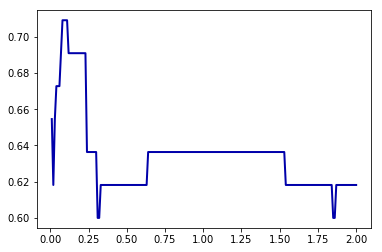

In [44]:
epsilon = 0.01
xvals, yvals = [], []
n = 0
for i in range(200):
    n += epsilon
    xvals.append(n)
    logreg = LogisticRegression(C=n).fit(X_train, y_train)
    yvals.append(logreg.score(X_test, y_test))

plt.plot(xvals, yvals)

# Scroll past errors to view the plot

It can be seen that the highest accuracy of about 73% is achieved when c = 0.1 This is why I have chosen this value.
It is the best compromise between accuracy and generalisation

## Random Forest Model

In [45]:
y_pred = rforest.predict(X_test)

print(f"Test set predictions: \n {y_pred}")

Test set predictions: 
 [1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0]


In [46]:
print(f"Training set score: {rforest.score(X_train, y_train)}")
print(f"Testing set score: {rforest.score(X_test, y_test)}")

Training set score: 0.7757575757575758
Testing set score: 0.6181818181818182


# Conclusion

## Table of Accuracies

|                          |    k-NN    | Logistic Regressor | Random Forest |
|:------------------------:|:----------:|:------------------:|:-------------:|
| Training set accuracy(%) |     74     |         66         |       76      |
|     Test set score(%)    |     69     |         73         |       67      |
|        Conclusion        | overfitted |     underfitted    |   overfitted  |

## The best performer: Logistic Regressor

This could be because logistic regressors scale well with large datasets and with many features: all of which may not be useful. I am not sure whether all of the features that I created are relevant. L2 regularization worked well.

k-NN does not work well with many features. Random Forest also seemed to overfit.

This could also be because some features could be misleading.

I have indicated whether each model overfitted or underfitted in the table above. For example, since k-NN had a higher training set accuracy, it means that it relied too much upon the training data for classifications.

For this particular dataset, and the feature vectors I created, I would choose the Logistic Regressor as it shows the greatest accuracy. Also, it is incredibly fast to train and quite fast in making predictions as well

As for the values and parameters of various functions, for k-NN, 2 neighbours achieved a good balance. It did not overfit as 1 did and did not underfit as 3 began to

For the value of c in the regressor, I plotted a graph above. This revealed the optimum value to be around 0.1